### <strong> Filename: </strong> <em>covid_19_time_series_comfirmed_cases.ipynb<em>
##### <strong>Description:</strong> <em>Creates an Scatter plot of all confirmed cases of COVID-19 in the world using dataset provided by https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases</em>
##### <strong>Author:</strong> <em> Carlos Eduardo Beluzo (cbeluzo@gmail.com)</em>
##### <strong>Creation:</strong> <em> Mar/2020 </em>
##### <strong>Version:</strong> <em> 2020.03-3 </em>

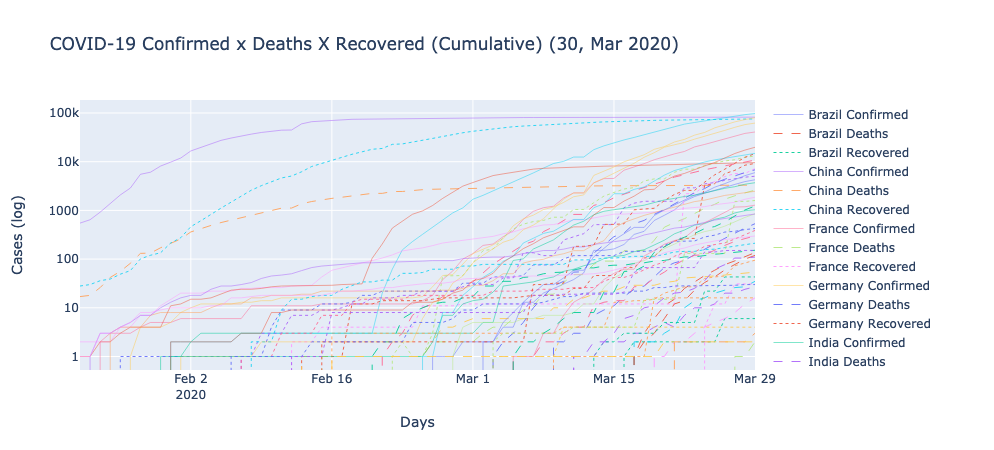

'../plotly/covid_19_time_series_comfirmed_deaths_recovered.html'

In [100]:
import numpy as np
import pandas as pd
import datetime as dt
import plotly.graph_objects as go
import plotly as plt

dfConfirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
dfConfirmed = dfConfirmed.drop(['Province/State','Lat','Long'], axis = 1).fillna(0)
dfConfirmed = dfConfirmed.groupby('Country/Region').sum().T.reset_index().rename(columns = {'index':'Day'})
dfConfirmed[['Day']] = pd.to_datetime(dfConfirmed['Day'],utc=False)
dfConfirmed[['Day','Brazil']]

dfDeaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
dfDeaths = dfDeaths.drop(['Province/State','Lat','Long'], axis = 1).fillna(0)
dfDeaths = dfDeaths.groupby('Country/Region').sum().T.reset_index().rename(columns = {'index':'Day'})
dfDeaths[['Day']] = pd.to_datetime(dfDeaths['Day'],utc=False)

dfRecovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
dfRecovered = dfRecovered.drop(['Province/State','Lat','Long'], axis = 1).fillna(0)
dfRecovered = dfRecovered.groupby('Country/Region').sum().T.reset_index().rename(columns = {'index':'Day'})
dfRecovered[['Day']] = pd.to_datetime(dfRecovered['Day'],utc=False)

fig = go.Figure()
last_upt = dt.date.today()
title = 'COVID-19 Confirmed x Deaths X Recovered (Cumulative) (' + "{:%d, %b %Y}".format(last_upt) +')'


country_list = ['Brazil', 'China', 'France',  'Germany',
        'India', 'Italy',  'Japan',
        'Korea, South',  'Malaysia', 'Mexico',
        'Portugal', 'Singapore', 'South Africa', 'Spain',  'Sweden', 'Switzerland', 'Taiwan*',
        'United Kingdom']

#for country in dfA.columns[1:]:
for country in country_list:
    myMarker = dict(opacity= 0.3, line = dict(width = 0.5, color = 'rgb(0, 0, 0)'))
    fig.add_trace(go.Scatter(x=dfConfirmed.Day, 
                             y=dfConfirmed[country], 
                             mode='lines', 
                             name=str(country + ' Confirmed'),
                             text=np.full((dfConfirmed.shape[1],1), country), 
                             line=dict(width=0.5), 
                             marker = myMarker,
                             hovertemplate = "<b>%{text}</b><br>" +
                                             "<b>Day</b>: %{x}<br>" +
                                             "<b>Confirmed Cases</b>: %{y}<br>" +
                                             "<extra></extra>"
                             )
                 )

    fig.add_trace(go.Scatter(x=dfDeaths.Day,
                             y=dfDeaths[country],
                             mode='lines', 
                             name=str(country + ' Deaths'),
                             text=np.full((dfDeaths.shape[1],1), country), 
                             hovertemplate = "<b>%{text}</b><br>" +
                                             "<b>Day</b>: %{x}<br>" +
                                             "<b>Deaths</b>: %{y}<br>" +
                                             "<extra></extra>",
                             line=dict(width=0.9,dash='dash'),
                             marker = myMarker,
                            )
                 )

    fig.add_trace(go.Scatter(x=dfRecovered.Day,
                             y=dfRecovered[country],
                             mode='lines', 
                             name=str(country + ' Recovered'),
                             text=np.full((dfRecovered.shape[1],1), country), 
                             hovertemplate = "<b>%{text}</b><br>" +
                                             "<b>Day</b>: %{x}<br>" +
                                             "<b>Recovered</b>: %{y}<br>" +
                                             "<extra></extra>",
                             line=dict(width=0.9,dash='dot'),
                             marker = myMarker,
                            )
                 )

fig.update_layout(xaxis_title='Days',
                 yaxis_title='Cases (log)',
                 yaxis_type="log",
                 title_text=title)
fig.show()
plt.offline.plot(fig, filename="../plotly/covid_19_time_series_comfirmed_deaths_recovered.html")
#dfA.to_csv (r'../data/covid_19_time_series_comfirmed_cases.csv', index = False, header=True)